# Images

In [ ]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
import keras
from keras import layers
from keras.optimizers import Adam

Import the Dataset

In [ ]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
First training label: [6]


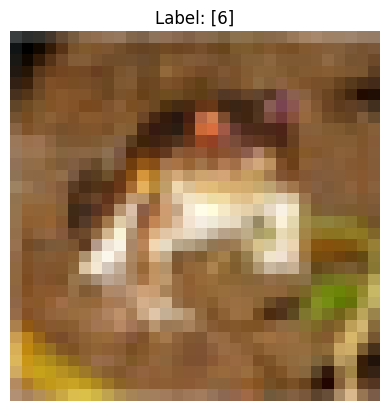

In [ ]:
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("First training label:", train_labels[0])

# Visualize one image
plt.imshow(train_images[0], cmap="gray")
plt.title(f"Label: {train_labels[0]}")
plt.axis("off")
plt.show()

Preprocess the data

In [ ]:
print(train_images.shape)

(50000, 32, 32, 3)


In [ ]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


Build the model

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

Train the model

In [ ]:
model_image = model.fit(train_images, train_labels, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.2930 - loss: 1.8713 - val_accuracy: 0.5247 - val_loss: 1.3239
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5342 - loss: 1.2986 - val_accuracy: 0.6085 - val_loss: 1.1068
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6089 - loss: 1.1059 - val_accuracy: 0.6257 - val_loss: 1.0596
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6513 - loss: 0.9926 - val_accuracy: 0.6633 - val_loss: 0.9631
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6849 - loss: 0.8949 - val_accuracy: 0.6698 - val_loss: 0.9508
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7152 - loss: 0.8133 - val_accuracy: 0.6830 - val_loss: 0.9077
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7341 - loss: 0.7597 - val_accuracy: 0.6992 - val_loss: 0.8813
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7538 - loss: 

Evaluate the model

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7161 - loss: 1.7999
Test Accuracy: 0.7103
Test Loss: 1.8097


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


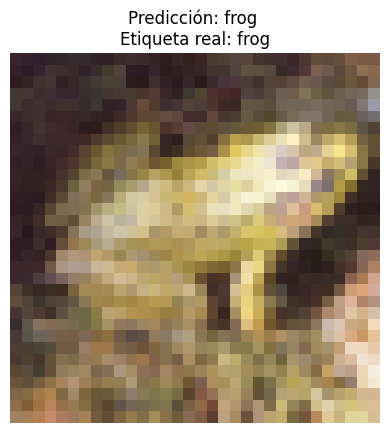

Predicción: frog (1.00)
Etiqueta real: frog


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

index = 19

# Real
image = test_images[index]
true_label = test_labels[index][0]

# Prediction
prediction = model.predict(np.array([image]))
predicted_label = np.argmax(prediction[0])

# Results
plt.imshow(image)
plt.title(f"Predicción: {class_names[predicted_label]} \nEtiqueta real: {class_names[true_label]}")
plt.axis("off")
plt.show()
print(f"Predicción: {class_names[predicted_label]} ({prediction[0][predicted_label]:.2f})")
print(f"Etiqueta real: {class_names[true_label]}")

In [ ]:
model.save("image_model.keras")

In [ ]:
from google.colab import files
files.download("image_model.keras")